In [1]:
import os
import xml.etree.ElementTree as ET
import struct
import numpy as np
import re
import cv2

In [2]:
classes_name =  ["bare land", "red tree", "dead tree", "down tree", "yellow tree", "pine tree"]

classes_num = {"bare land": 0, "red tree": 1, "dead tree": 2, "down tree": 3, "yellow tree": 4, "pine tree": 5}

In [3]:
YOLO_ROOT = os.path.abspath('./')
DATA_PATH = os.path.join(YOLO_ROOT, 'data/AerialTree/')
OUTPUT_PATH = os.path.join(YOLO_ROOT, 'data/processed_data/')

In [4]:
tree = ET.parse(DATA_PATH+'D1019020028.xml')

In [5]:
xml_list = [i for i in os.listdir(DATA_PATH) if i[-3:]=='xml']

In [6]:
xml_list

['D1019020111.xml',
 'D1019020114.xml',
 'D1019020149.xml',
 'D1019020153.xml',
 'D1019020198.xml',
 'D1019020087.xml',
 'D1019020183.xml',
 'D1019020028.xml',
 'D1019020081.xml',
 'D1019020180.xml',
 'D1019020030.xml',
 'D1019020177.xml',
 'D1019020186.xml',
 'D1019020122.xml',
 'D1019020192.xml',
 'D1019020157.xml',
 'D1019020144.xml',
 'D1019020125.xml',
 'D1019020161.xml',
 'D1019020137.xml',
 'D1019020083.xml',
 'D1019020085.xml',
 'D1019020133.xml',
 'D1019020141.xml',
 'D1019020131.xml',
 'D1019020120.xml',
 'D1019020146.xml',
 'D1019020117.xml',
 'D1019020097.xml',
 'D1019020173.xml',
 'D1019020089.xml',
 'D1019020128.xml',
 'D1019020201.xml',
 'D1019020078.xml',
 'D1019020189.xml']

In [7]:
object_list = []

In [8]:
for xml_file in xml_list:
    tree = ET.parse(DATA_PATH+xml_file)
    root = tree.getroot()
    for item in root:
        if item.tag == 'object':
            object_list.append(int(item[0].text))

In [9]:
temp = np.asarray(object_list)


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
x = np.arange(6)
y = [sum(temp==i) for i in x]

<Container object of 6 artists>

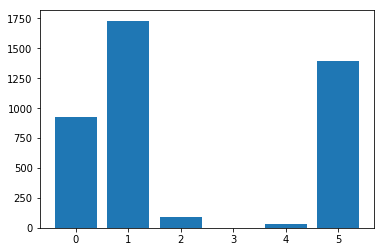

In [12]:
plt.bar(x, y)

In [13]:
width = []
height = []
for xml_file in xml_list:
    tree = ET.parse(DATA_PATH+xml_file)
    root = tree.getroot()
    for item in root:
        if item.tag == 'object' and item[0].text in ['0','1']:
            for it in item:
                if it.tag == 'bndbox':
                    width.append(int(it[2].text)-int(it[0].text))
                    height.append(int(it[3].text)-int(it[1].text))
                    

In [14]:
np.mean(width)

37.37241638481774

In [15]:
np.mean(height)

33.288237504697484

(array([  39.,  181.,  467.,  649.,  404.,  319.,  233.,  138.,   57.,
          57.,   31.,   19.,    9.,    8.,    3.,    9.,    4.,    3.,
           6.,    3.,    1.,    1.,    2.,    1.,    2.,    2.,    4.,
           1.,    2.,    0.,    0.,    1.,    0.,    0.,    0.,    1.,
           0.,    1.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,
           0.,    0.,    0.,    1.,    1.]),
 array([   8.  ,   13.26,   18.52,   23.78,   29.04,   34.3 ,   39.56,
          44.82,   50.08,   55.34,   60.6 ,   65.86,   71.12,   76.38,
          81.64,   86.9 ,   92.16,   97.42,  102.68,  107.94,  113.2 ,
         118.46,  123.72,  128.98,  134.24,  139.5 ,  144.76,  150.02,
         155.28,  160.54,  165.8 ,  171.06,  176.32,  181.58,  186.84,
         192.1 ,  197.36,  202.62,  207.88,  213.14,  218.4 ,  223.66,
         228.92,  234.18,  239.44,  244.7 ,  249.96,  255.22,  260.48,
         265.74,  271.  ]),
 <a list of 50 Patch objects>)

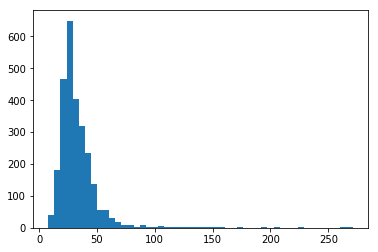

In [16]:
plt.hist(height, 50)

(array([  30.,  219.,  460.,  554.,  467.,  340.,  212.,  127.,   77.,
          48.,   29.,   18.,   16.,   11.,    9.,    7.,    7.,    3.,
           3.,    4.,    3.,    0.,    3.,    3.,    1.,    1.,    2.,
           1.,    0.,    1.,    0.,    1.,    0.,    1.,    0.,    0.,
           0.,    1.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.]),
 array([   9.,   15.,   21.,   27.,   33.,   39.,   45.,   51.,   57.,
          63.,   69.,   75.,   81.,   87.,   93.,   99.,  105.,  111.,
         117.,  123.,  129.,  135.,  141.,  147.,  153.,  159.,  165.,
         171.,  177.,  183.,  189.,  195.,  201.,  207.,  213.,  219.,
         225.,  231.,  237.,  243.,  249.,  255.,  261.,  267.,  273.,
         279.,  285.,  291.,  297.,  303.,  309.]),
 <a list of 50 Patch objects>)

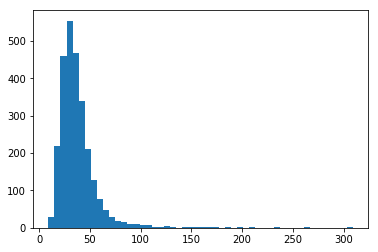

In [17]:
plt.hist(width, 50)

In [18]:
# img_file = xml_file[:-3] + 'JPG'
# img = cv2.imread(DATA_PATH + img_file)

In [19]:
def relu(x):
    return max(x,0)

def get_object_list(xml_file):
    tree = ET.parse(DATA_PATH+xml_file)
    root = tree.getroot()
    object_list = []
    for item in root:
        if item.tag == 'object' and item[0].text in ['0','1']:
            object_list.append(item)
    return object_list

def notate_a_img(filename):
    jpg_file = DATA_PATH + filename + '.JPG'
    object_list = get_object_list(filename+'.xml')
    img = cv2.imread(jpg_file)
    for item in object_list:
        for it in item:
            if it.tag == 'bndbox':
                cv2.rectangle(img, (relu(int(it[0].text)-20), relu(int(it[1].text)-20)),\
                                    (int(it[2].text)+20, int(it[3].text)+20), (0, 0, 255))
    cv2.imwrite(OUTPUT_PATH + 'test.JPG', img)

In [20]:
cv2.imwrite(OUTPUT_PATH + 'test.JPG', img[:5000,:5000,:])
cv2.imwrite(OUTPUT_PATH + 'origin.JPG', img)

NameError: name 'img' is not defined

In [22]:
def get_bndbox(ob, width=float('inf'), height=float('inf')):
    bndbox = ob.find('bndbox')
    ob_xmin = relu(int(bndbox.find('xmin').text) - 20)
    ob_ymin = relu(int(bndbox.find('ymin').text) - 20)
    ob_xmax = min(int(bndbox.find('xmax').text) + 20, width)
    ob_ymax = min(int(bndbox.find('ymax').text) + 20, height)
    return ob_xmin, ob_ymin, ob_xmax, ob_ymax

def random_crop(width, height, ob_box):
    left_closer_to_boundary = ob_box[0] <= (width - ob_box[2])
    up_closer_to_boundary = ob_box[1] <= (height - ob_box[3])
    if left_closer_to_boundary:
        xmin = max(ob_box[0] - np.random.choice(np.arange(448-(ob_box[2] - ob_box[0]))), 0)
        xmax = xmin + 448
    else:
        xmax = min(ob_box[2] + np.random.choice(np.arange(448-(ob_box[2] - ob_box[0]))), width)
        xmin = xmax - 448
    if up_closer_to_boundary:
        ymin = max(ob_box[1] - np.random.choice(np.arange(448-(ob_box[3] - ob_box[1]))), 0)
        ymax = ymin + 448
    else:
        ymax = min(ob_box[3] + np.random.choice(np.arange(448-(ob_box[3] - ob_box[1]))), height)
        ymin = ymax - 448
    return xmin, ymin, xmax, ymax

def iou(boxes1, boxes2):
    lu = np.maximum(boxes1[0:2], boxes2[0:2])
    rd = np.minimum(boxes1[2:], boxes2[2:])
    intersection = np.maximum(rd - lu, [0,0])
    inter_square = intersection[0]*intersection[1]
    square1 = (boxes1[2]-boxes1[0]) * (boxes1[3] - boxes1[1])
    square2 = (boxes2[2]-boxes2[0]) * (boxes2[3] - boxes2[1])
    return inter_square / (square1 + square2 + 1e-5 - inter_square)

def include_ratio(crop, ob_box):
    lu = np.maximum(crop[0:2], ob_box[0:2])
    rd = np.minimum(crop[2:], ob_box[2:])
    intersection = np.maximum(rd - lu, [0,0])
    inter_square = intersection[0]*intersection[1]
    square_ob = (ob_box[2]-ob_box[0]) * (ob_box[3] - ob_box[1])
    return inter_square / (square_ob + 1e-5)

def find_all_objects_in_a_crop(crop, object_list, width, height, include_threshold=0.7):
    # @param width: original image width
    # @param height: original image height
    obs_str = ''
    for ob in object_list:
        ob_box = get_bndbox(ob, width, height)
        if include_ratio(crop, ob_box) > include_threshold:
            obs_str += ' ' + str(max(ob_box[0] - crop[0], 0))
            obs_str += ' ' + str(max(ob_box[1] - crop[1], 0))
            obs_str += ' ' + str(min(ob_box[2] - crop[0], crop[2]))
            obs_str += ' ' + str(min(ob_box[3] - crop[1], crop[3]))
            obs_str += ' ' + ob[0].text
    obs_str += '\n'
    return obs_str
    
def get_crops(ob, img, object_list, num_crops=2):
    width, height = img.shape[1], img.shape[0]
    ob_box = get_bndbox(ob, width, height)
    if max(ob_box[2]-ob_box[0], ob_box[3] - ob_box[1]) > 300:
        return [], []
    crop_imgs_list = []
    label_str_list = []
    for i in range(num_crops):
        crop = random_crop(width, height, ob_box)
        label_str = find_all_objects_in_a_crop(crop, object_list, width, height)
        label_str_list.append(label_str)
        crop_imgs_list.append(img[crop[1]:crop[3], crop[0]:crop[2]])
    return crop_imgs_list, label_str_list

def process_a_file(filename, num_crops=2, train_data=True):
    post = 'train/' if train_data else 'test/'
    xml_file = DATA_PATH + filename + '.xml'
    jpg_file = DATA_PATH + filename + '.JPG'
    out_filename = OUTPUT_PATH + 'train_label.txt' if train_data else OUTPUT_PATH + 'test_label.txt'
    out_file = open(out_filename, 'a')
    tree = ET.parse(xml_file)
    root = tree.getroot()
    object_list = []
    for item in root:
        if item.tag == 'object' and item[0].text in ['0','1']:
            object_list.append(item)
    img = cv2.imread(jpg_file)
    for k, ob in enumerate(object_list):
        crop_imgs_list, label_str_list = get_crops(ob, img, object_list, num_crops)
        for i, crop in enumerate(crop_imgs_list):
            crop_name = OUTPUT_PATH + post + filename + '_ob{}_crop{}.JPG'.format(k, i)
            cv2.imwrite(crop_name, crop)
            record = crop_name + label_str_list[i]
            out_file.write(record)
    out_file.close()
    print('successfully crop all images')
    return 1

In [93]:
process_a_file(img_file[:-4], num_crops=2, train_data=True)

successfully crop all images


1

In [23]:
def get_object_list_from_label_txt(label_file, jpg_file):
    with open(label_file, 'r') as f:
        content = f.readlines()
        object_list = []
        for string in content:
            if string.startswith(jpg_file):
                string = string.strip(jpg_file).strip(' ').strip('\n')
                numbers = string.split(' ')
                for i in range(len(numbers)//5):
                    temp = []
                    for j in range(5):
                        temp.append(int(numbers[5*i+j]))
                    object_list.append(temp)
                return object_list
        print("can't find records of {}".format(jpg_file))
        return None

In [33]:
label_file = OUTPUT_PATH + 'train_label.txt'
jpg_file = '/home/rui/tensorflow-yolo/data/processed_data/train/D1019020189_ob1_crop1.JPG'
get_object_list_from_label_txt(label_file, jpg_file)

[[159, 11, 240, 87, 1], [18, 376, 107, 448, 0]]

In [24]:
def get_object_list_from_label_txt(label_file, jpg_file):
    with open(label_file, 'r') as f:
        content = f.readlines()
        object_list = []
        for string in content:
            if string.startswith(jpg_file):
                string = string.strip(jpg_file).strip(' ').strip('\n')
                numbers = string.split(' ')
                for i in range(len(numbers)//5):
                    temp = []
                    for j in range(5):
                        temp.append(int(numbers[5*i+j]))
                    object_list.append(temp)
                return object_list
        print("can't find records of {}".format(jpg_file))
        return None
        

def notate_a_crop(jpg_file, label_txt='train_label.txt'):
    label_file = OUTPUT_PATH + label_txt
    object_list = get_object_list_from_label_txt(label_file, jpg_file)
    img = cv2.imread(jpg_file)
    for item in object_list:
        if item[4] == 1:
            cv2.rectangle(img, (item[0], item[1]), (item[2], item[3]), (0, 0, 255))
        else:
            cv2.rectangle(img, (item[0], item[1]), (item[2], item[3]), (255, 0, 0))
    sub_name = jpg_file.split('/')[-1]
    cv2.imwrite(OUTPUT_PATH + 'notated_crop/'+sub_name, img)

In [36]:
np.random.rand()

0.5760929792670608

In [25]:
for xml_file in xml_list[:-5]:
    filename = xml_file[:-4]
    process_a_file(filename)
crop_list = [i for i in os.listdir(OUTPUT_PATH+'train/') if i[-3:]=='JPG']
for jpg_file in crop_list:
    if np.random.rand() > 0.01:
        continue
    else:
        jpg_file = OUTPUT_PATH + 'train/' + jpg_file
        notate_a_crop(jpg_file)

successfully crop all images
successfully crop all images
successfully crop all images
successfully crop all images
successfully crop all images
successfully crop all images
successfully crop all images
successfully crop all images
successfully crop all images
successfully crop all images
successfully crop all images
successfully crop all images
successfully crop all images
successfully crop all images
successfully crop all images
successfully crop all images
successfully crop all images
successfully crop all images
successfully crop all images
successfully crop all images
successfully crop all images
successfully crop all images
successfully crop all images
successfully crop all images
successfully crop all images
successfully crop all images
successfully crop all images
successfully crop all images
successfully crop all images
successfully crop all images


In [26]:
for xml_file in xml_list[-5:]:
    filename = xml_file[:-4]
    process_a_file(filename, train_data=False)

successfully crop all images
successfully crop all images
successfully crop all images
successfully crop all images
successfully crop all images
